In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# data_RAW = pd.read_csv('EmissiesVulwagens_202501.csv')
data_RAW = pd.read_csv('Data/VW4_20250121_0618_146.csv', delimiter=',')

In [3]:
# data_RAW.shape
#(546, 14)
data_RAW.columns

Index(['Unnamed: 0', 'dB', 'dP1', 'dP2', 'dP3', 'dP4', 'Vijzel1', 'Vijzel2',
       'Vijzel3', 'Vijzel4', 'OvenNr', 'Vullen', 'Kolentoren', 'Toeleggen'],
      dtype='object')

In [4]:
data_RAW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    object 
 1   dB          545 non-null    float64
 2   dP1         545 non-null    float64
 3   dP2         545 non-null    float64
 4   dP3         545 non-null    float64
 5   dP4         545 non-null    float64
 6   Vijzel1     545 non-null    float64
 7   Vijzel2     545 non-null    float64
 8   Vijzel3     545 non-null    float64
 9   Vijzel4     545 non-null    float64
 10  OvenNr      546 non-null    int64  
 11  Vullen      546 non-null    bool   
 12  Kolentoren  546 non-null    bool   
 13  Toeleggen   546 non-null    bool   
dtypes: bool(3), float64(9), int64(1), object(1)
memory usage: 48.7+ KB


In [5]:
data_toclean = data_RAW.copy()

In [6]:
# Renaming the first column
data_toclean.rename(columns={'Unnamed: 0': 'Timestamp'}, inplace=True)
data_toclean.head()

,Timestamp,dB,dP1,dP2,dP3,dP4,Vijzel1,Vijzel2,Vijzel3,Vijzel4,OvenNr,Vullen,Kolentoren,Toeleggen
0,2025-01-21 08:27:00.526,114.7,-43.494,-44.086,-45.416,-49.514,0.0,0.0,0.0,0.0,246,True,False,False
1,2025-01-21 08:27:00.957,114.8,-43.494,-44.107,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2,2025-01-21 08:27:01.457,114.8,-43.515,-44.381,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
3,2025-01-21 08:27:01.957,115.3,-43.515,-44.403,-45.416,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
4,2025-01-21 08:27:02.457,115.3,-43.515,-44.086,-45.480,-49.493,0.0,0.0,0.0,0.0,246,True,False,False


In [7]:
data_toclean_dti = data_toclean.copy()
data_toclean_dti['Timestamp'] = pd.to_datetime(data_toclean_dti['Timestamp'], errors='coerce')
# Setting the 'Timestamp' column as the DatetimeIndex
data_toclean_dti.set_index('Timestamp', inplace=True)
data_toclean_dti.head()

,dB,dP1,dP2,dP3,dP4,Vijzel1,Vijzel2,Vijzel3,Vijzel4,OvenNr,Vullen,Kolentoren,Toeleggen
Timestamp,,,,,,,,,,,,,
2025-01-21 08:27:00.526,114.7,-43.494,-44.086,-45.416,-49.514,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:00.957,114.8,-43.494,-44.107,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.457,114.8,-43.515,-44.381,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.957,115.3,-43.515,-44.403,-45.416,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:02.457,115.3,-43.515,-44.086,-45.480,-49.493,0.0,0.0,0.0,0.0,246,True,False,False


In [8]:
# Determine start-/end-timestamps for each 'Vijzel'
def determine_timestamps(df, column_names, zone_data):
 for i, column in enumerate(column_names):
  column_name_dP = f'dP{i + 1}'
  zone_data[0][i] = df[df[column] > 1.0].index[0]
  zone_data[1][i] = df[df[column] > (df[column].max()- 3.0)].index[0]
  zone_data[2][i] = df[df.index < zone_data[0][i]][column_name_dP].mean()
 return zone_data

In [9]:
vijzels_tocheck = ['Vijzel1', 'Vijzel2', 'Vijzel3', 'Vijzel4']
# len(vijzels_tocheck)
vijzels_data = [[0 for _ in range(len(vijzels_tocheck))] for _ in range(3)]
# vijzels_timestamps
# [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

# Condities bepalen zone vijzelen dP's obv #toeren vijzels
determine_timestamps(data_toclean_dti, vijzels_tocheck, vijzels_data)
vijzels_data

[[Timestamp('2025-01-21 08:28:34.957000'),
  Timestamp('2025-01-21 08:28:33.457000'),
  Timestamp('2025-01-21 08:28:34.957000'),
  Timestamp('2025-01-21 08:28:34.957000')],
 [Timestamp('2025-01-21 08:29:51.957000'),
  Timestamp('2025-01-21 08:30:11.957000'),
  Timestamp('2025-01-21 08:30:07.957000'),
  Timestamp('2025-01-21 08:30:05.957000')],
 [-43.539793650793655,
  -43.96479032258065,
  -45.462190476190464,
  -49.14344444444445]]

In [10]:
data_toclean_dti.head()

,dB,dP1,dP2,dP3,dP4,Vijzel1,Vijzel2,Vijzel3,Vijzel4,OvenNr,Vullen,Kolentoren,Toeleggen
Timestamp,,,,,,,,,,,,,
2025-01-21 08:27:00.526,114.7,-43.494,-44.086,-45.416,-49.514,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:00.957,114.8,-43.494,-44.107,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.457,114.8,-43.515,-44.381,-45.459,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.957,115.3,-43.515,-44.403,-45.416,-49.472,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:02.457,115.3,-43.515,-44.086,-45.480,-49.493,0.0,0.0,0.0,0.0,246,True,False,False


In [11]:
# Offset dPs
dPs_tocheck = ['dP1', 'dP2', 'dP3', 'dP4']

for i, column in enumerate(dPs_tocheck):
 data_toclean_dti[column] = data_toclean_dti[column] - vijzels_data[2][i]

data_toclean_dti.head()

# to redo !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

,dB,dP1,dP2,dP3,dP4,Vijzel1,Vijzel2,Vijzel3,Vijzel4,OvenNr,Vullen,Kolentoren,Toeleggen
Timestamp,,,,,,,,,,,,,
2025-01-21 08:27:00.526,114.7,0.045794,-0.12121,0.04619,-0.370556,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:00.957,114.8,0.045794,-0.14221,0.00319,-0.328556,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.457,114.8,0.024794,-0.41621,0.00319,-0.328556,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:01.957,115.3,0.024794,-0.43821,0.04619,-0.328556,0.0,0.0,0.0,0.0,246,True,False,False
2025-01-21 08:27:02.457,115.3,0.024794,-0.12121,-0.01781,-0.349556,0.0,0.0,0.0,0.0,246,True,False,False


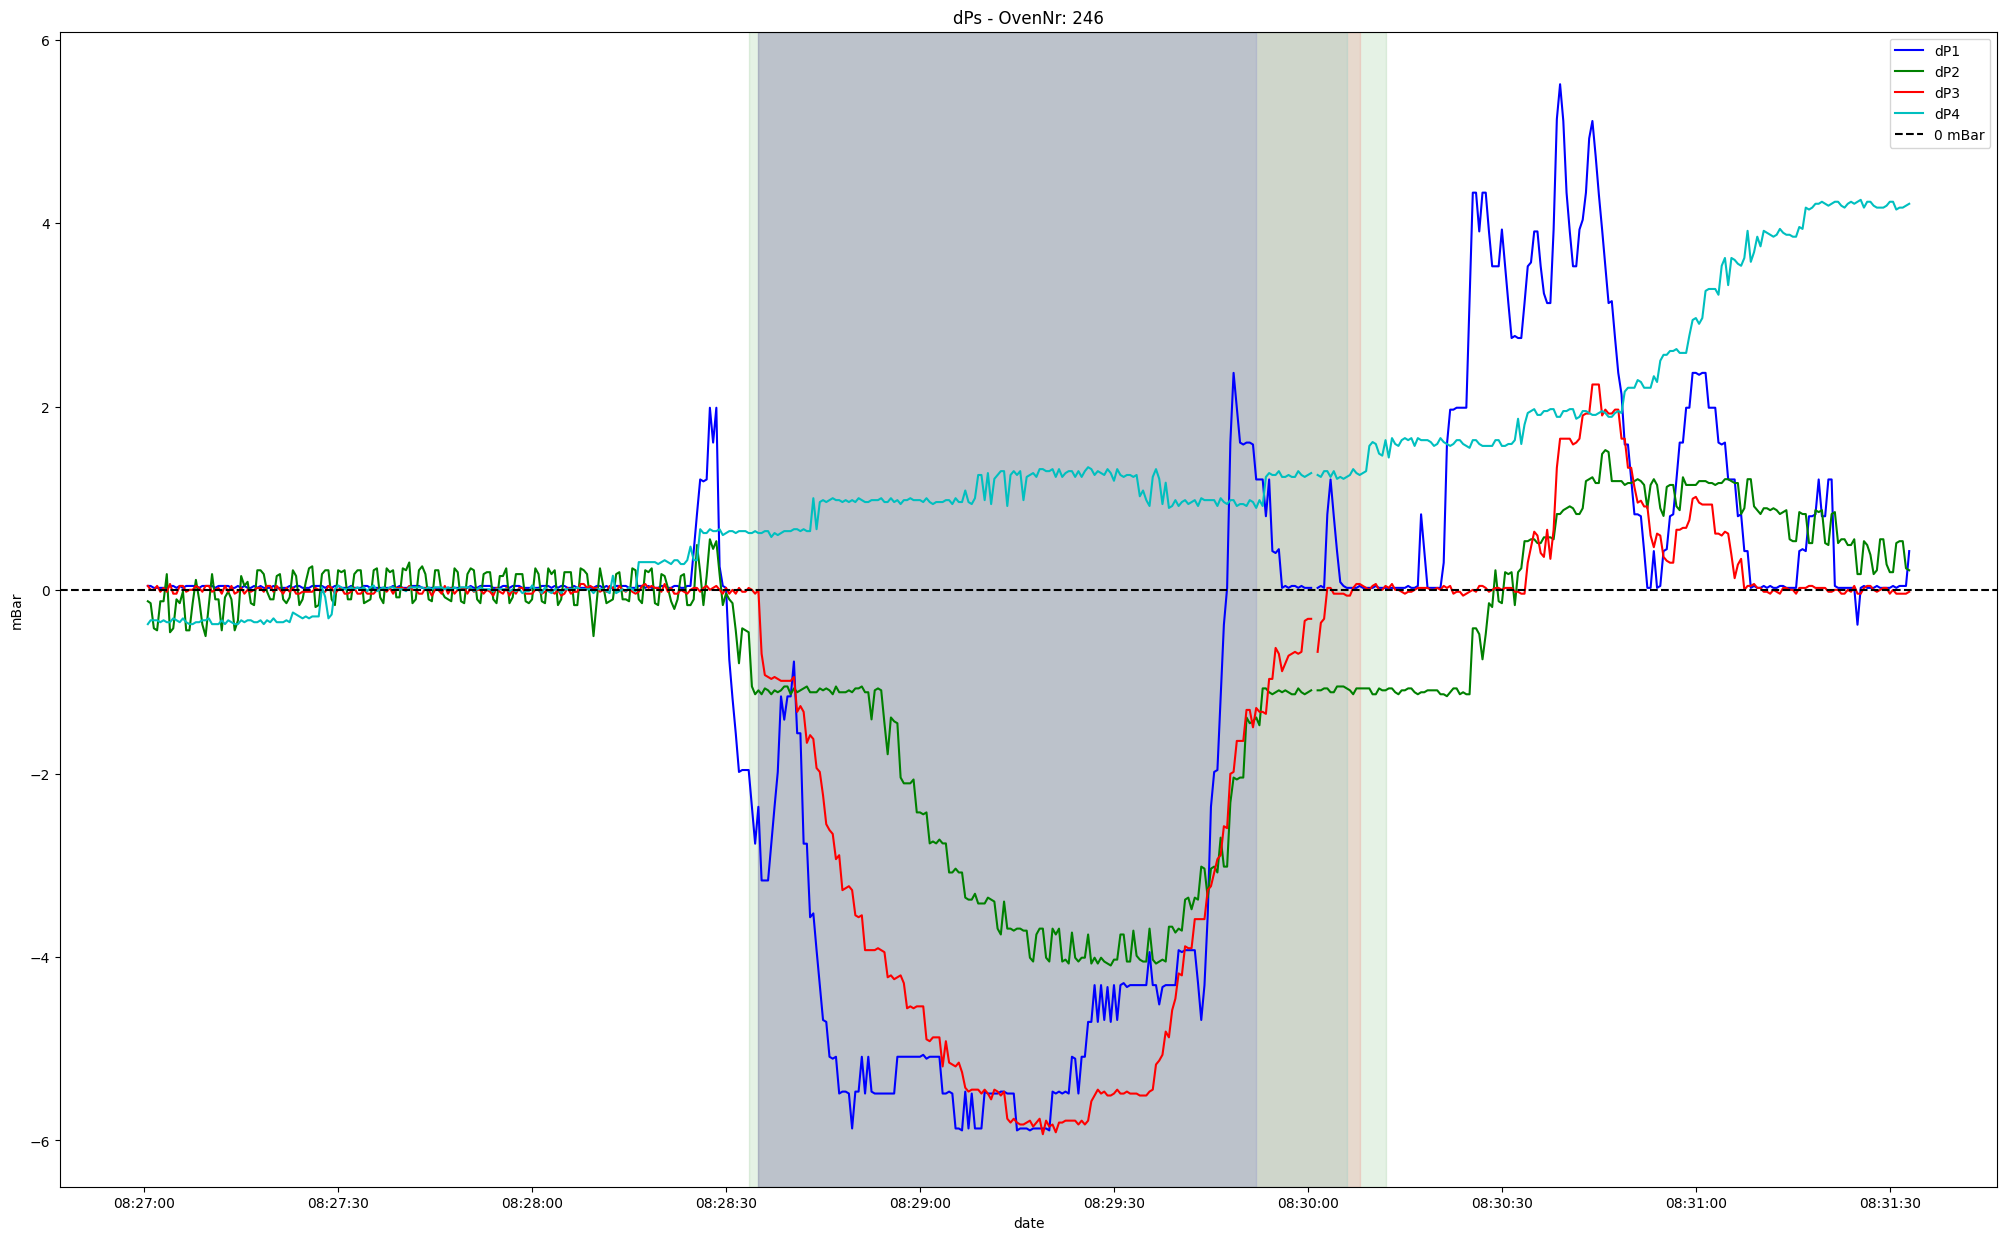

In [12]:
# Ovennummer bepalen
OvenNr = data_toclean_dti['OvenNr'].iloc[0]

# Figuur plotten
fig, ax1 = plt.subplots(figsize=(25, 15))

# Plotting the first axis
ax1.plot(
    data_toclean_dti.index,
    data_toclean_dti['dP1'].values,
    'b-',
    label='dP1',
)
ax1.plot(
    data_toclean_dti.index,
    data_toclean_dti['dP2'].values,
    'g-',
    label='dP2',
)
ax1.plot(
    data_toclean_dti.index,
    data_toclean_dti['dP3'].values,
    'r-',
    label='dP3',
)
ax1.plot(
    data_toclean_dti.index,
    data_toclean_dti['dP4'].values,
    'c-',
    label='dP4',
)
ax1.set_xlabel('date')
ax1.set_ylabel('mBar')

plt.title(f'dPs - OvenNr: {OvenNr}')
plt.axvspan(vijzels_data[0][0], vijzels_data[1][0], color='b', alpha=0.1)
plt.axvspan(vijzels_data[0][1], vijzels_data[1][1], color='g', alpha=0.1)
plt.axvspan(vijzels_data[0][2], vijzels_data[1][2], color='r', alpha=0.1)
plt.axvspan(vijzels_data[0][3], vijzels_data[1][3], color='c', alpha=0.1)
plt.axhline(y=0, color='k', linestyle='--', label='0 mBar')
plt.legend()
plt.show()